<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 5 - SVM

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 5.1 Theory 


## 5.1.1 [1 Point] Evaluation metrics
- Tóm tắt các chuẩn đánh giá phổ biến trong ML và các lưu ý sử dụng.

**Answer**: Cho regressions: xem slide. Cho classification: 

$\text{Accuracy} = \frac{TP+TN}{TP+FP+FN+TN}$ 

Là tổng số lần predict đúng trên tổng số predictions. Áp dụng cho balanced dataset.

$\text{Precision} = \frac{TP}{TP+FP}$ 

độ chính xác = dự đoán positive đúng/ tổng dự đoán là positive của model (cho binary class). Dùng cho những model muốn chắc chắn về khả năng dự đoán đúng của mình. 

$\text{Recall} = \frac{TP}{TP+FN}$

độ nhạy = dự đoán positive đúng/ tổng positive trên thực tế. Dùng cho những trường hợp muốn model không bỏ sót possitive cases thực tế.

$\text{F1} = 2\times \frac{P \times R}{P+R}$

trong đoạn [0,1] là thước đo "trung hòa" giữa precision và recall. Hướng đến best score giải quyết vấn đề tradeoff giữa Precision và Recall. Thường được áp dụng nhiều. Ví dụ: Giả sử công an bắt cướp thì phải chắc chắn là bắt đúng cướp (Precision), và bắt thiệt nhiều cướp (Recall).



## 5.1.2 [1 Point] SVM
- Tóm tắt các ý tưởng chính của SVM. Vì sao SVM vẫn là linear model?

**Answer**: 
SVM cực đại margin (khoảng cách từ điểm gần nhất tới decision boundary tất cả các class) để mô hình bền vững (robust) hơn cho nhiễu. Tối ưu hàm hinge loss bằng phương pháp Lagrange, giải bằng quadratic solvers. Decision boundary vẫn là hyperlane, và model là linear combination (kết hợp tuyến tính) của parameters và features nên SVM vẫn là linear model.


## 5.1.3 [1 Point] Kernel SVM
- Tóm tắt các ý tưởng chính của kernel SVM. Vì sao kernel-SVM là nonlinear models?

**Answer**: 
Kernel SVM dùng hàm $\Phi(x)$ để nhúng dữ liệu lên nhiều chiều (có khi vô hạn chiều) để dữ liệu trở nên dễ linearly separable hơn. Gaussian kernels thường được dùng vì nó nhúng inputs lên vô hạn chiều và có giả thiết càng lên nhiều chiều thì càng dễ linearly separable. Khi đó dễ có một hyperlane để làm decision boundary cho các class trong dữ liệu. Chú ý decision boundary sau khi nhúng sẽ là hyperlane do trong không gian nhúng $\Phi(x)$ ta sử dụng linear model SVM, nhưng trong không gian dữ liệu đầu vào ban đầu, khi chiếu decision boundary ngược trở lại thì nó sẽ không phải hyperlane mà là nonlinear decision boundary. 

Một ý tưởng quan trọng khác của kernel SVMs đó là inner products trong không gian nhúng $\Phi(x)$ để tính SVM trở thành kernel output trong không gian đầu vào $X$:
$$\Phi(x)^\top \Phi(x') = k(x,x')$$
Do đó ta không cần tính $\Phi(x)$ và $\Phi(x')$ rồi tính $\Phi(x)^\top \Phi(x')$ mà chỉ cần tính trực tiếp $k(x,x')$.

# 5.2 Coding

In [ ]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt


Trong bài tập này, chúng ta sẽ kết hợp PCA và SVM để thực hiện mô hình nhận diện khuôn mặt **(Face Recognition)**

Dataset sẽ dụng là Olivetti Faces (sklearn có sẵn)

Dataset bao gồm:


*   10 tấm hình trắng đen cho mỗi label (khuôn mặt)
*   40 khuôn mặt
*   Ảnh đã được convert về khoảng $[0, 1]$ và chuyển sang float
*   Hình được chụp ở các thời điểm sáng tối khác nhau và các biểu cảm khác nhau


## 5.2.1 [1 Point] Chuẩn bị dataset

Chạy cell bên dưới để download dataset

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Trong class dataset bao gồm


*   data: numpy array với shape (400, 4096) đã được scale
*   target: label của các tấm hình với shape (400,)
*   images: tương ứng với data, nhưng có shape (400, 64, 64) ta sẽ dùng images để tiện cho việc visualize



In [ ]:
# TODO
# 1. Lấy data từ dataset đặt tên là X
# 2. Lấy label từ dataset đặt tên là y
# 3. Lấy images từ dataset đặt tên là images
# 3. In ra shape của X,y,images để kiểm tra

X = dataset.data
y = dataset.target
images = dataset.images
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Shape of images:', images.shape)


Shape of X: (400, 4096)
Shape of y: (400,)
Shape of images: (400, 64, 64)


**Note: X có 4096 features tương đương với X là 1 tấm hình có shape (64, 64)**

In [ ]:
# constants for image height, width
IMG_H = 64
IMG_W = 64 

Kiểm tra xem X có đang ở định dạng float và có giá trị từ 0 đến 1 hay không

In [ ]:
# TODO:
# 1. In ra kiểu dữ liệu của X (học viên tự googe, lưu ý X là numpy array)
# 2. In ra giá trị min và max của X

print('Type of X:', X.dtype)
print('Minimum value of X:', np.min(X))
print('Maximum value of X:', np.max(X))


Type of X: float32
Minimum value of X: 0.0
Maximum value of X: 1.0


Do dataset có tổng cộng 40 khuôn mặt (label), ta cần kiểm tra xem đây là bài toán balanced-class hay imbalanced-class

In [ ]:
# TODO:
# 1. Dùng hàm np.unique() để  in ra tất cả giá trị của y 
# và đếm số lần xuất hiện của chúng (xem thêm google)

np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

Chia data thành Train Set và Test Set

**Giới thiệu parameter mới của train_test_split**

stratify=y

Truyền tham số này vào để  bảo đảm các class trong y_test sẽ được balanced

Ví dụ: chúng ta có 10 hình cho mỗi class, test_size=0.3 sẽ lấy ra 3 hình từ mỗi class

In [ ]:
# TODO:
# 1. import thư viện từ sklearn
# 2. Chia data thành train set và test set
# 3. test_size=0.3, random_state=42, và 1 parameter mới stratify=y
# 4. In ra shape của Train Set và Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, shuffle=True, 
                                                    random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (280, 4096)
Shape of y_train: (280,)
Shape of X_test: (120, 4096)
Shape of y_test: (120,)


Kiểm tra độ balance của y_test và y_train

In [ ]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))

In [ ]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))

## 5.2.2 Visualize data

Show ra tất cả 40 khuôn mặt


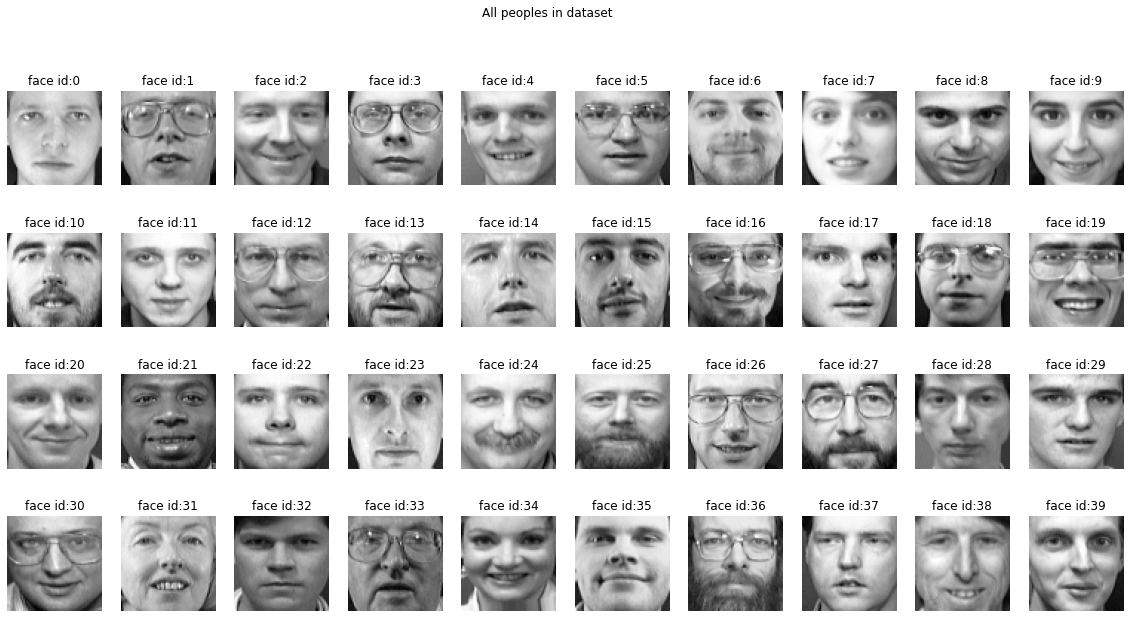

In [ ]:
def show_all_people_images():
  # subplots with 4 rows and 10 cols
  rows = 4
  cols = 10

  fig, axs = plt.subplots(rows, cols, figsize=(20,10))
  # axs is a matrix with shape (4, 10)
  # we flatten axs for ez coding
  axs=axs.flatten()

  for i in range(rows * cols):
    image_index= i*10
    axs[i].imshow(images[image_index], cmap='gray')
    axs[i].grid('off')
    axs[i].axis('off')
    axs[i].set_title("face id:{}".format(i))
  plt.suptitle("All peoples in dataset")
  plt.show()
show_all_people_images()

Show 10 khuôn mặt thuộc 1 class bất kỳ

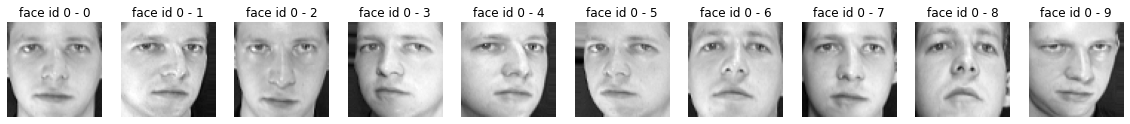

In [ ]:
def show_all_images_in_one_class(class_id):
  rows = 1
  cols = 10
  fig, axs = plt.subplots(rows, cols, figsize=(20,5))
  axs = axs.flatten()
  for i in range(10):
    image_index = class_id*10+i
    axs[i].imshow(images[image_index], cmap='gray')
    axs[i].grid('off')
    axs[i].axis('off')
    axs[i].set_title('face id {} - {}'.format(class_id, i))
  plt.show()

show_all_images_in_one_class(0)

## 5.2.3 [1 Point] Áp dụng PCA cho data

Trước khi áp dụng PCA, ta cần normalize data

In [ ]:
# TODO
# 1. Dùng StandardScaler để normalize X_train và X_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Đầu tiên ta cần xác định sẽ dùng PCA với bao nhiêu components

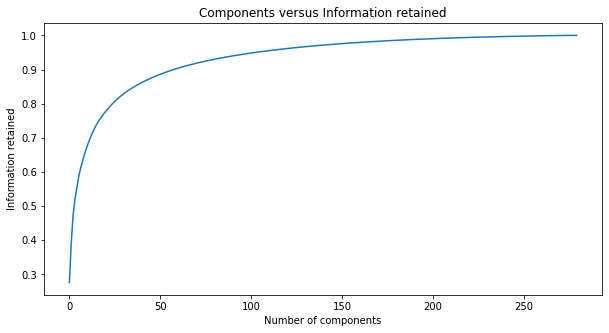

In [ ]:
# TODO
# 1. import pca từ sklearn
# 2. khởi tạo pca mà không truyền tham số vào
# 4. fit pca trên X_train
# 5. vẽ chart để xác định số components cần sử dụng

from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Information retained')
plt.title('Components versus Information retained')
plt.show()

Từ chart trên, học viên tự chọn số component mà mình muốn

**Note: tạm thời sẽ truyền vào số components bằng 120 để phục vụ cho việc minh hoạ homework, sau khi hoàn thành mọi người có thể tự do sửa lại số components theo ý thích**

In [ ]:
# TODO
# 1. khởi tạo pca với số components là 120
# 2. fit pca trên X_train
# 3. transform trên X_train, X_test, đặt tên các biến là X_train_pca và X_test_pca
pca = PCA(120).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Từ X_train_pca ta thử tái tạo lại các khuôn mặt, chỉ cần chạy cell bên dưới

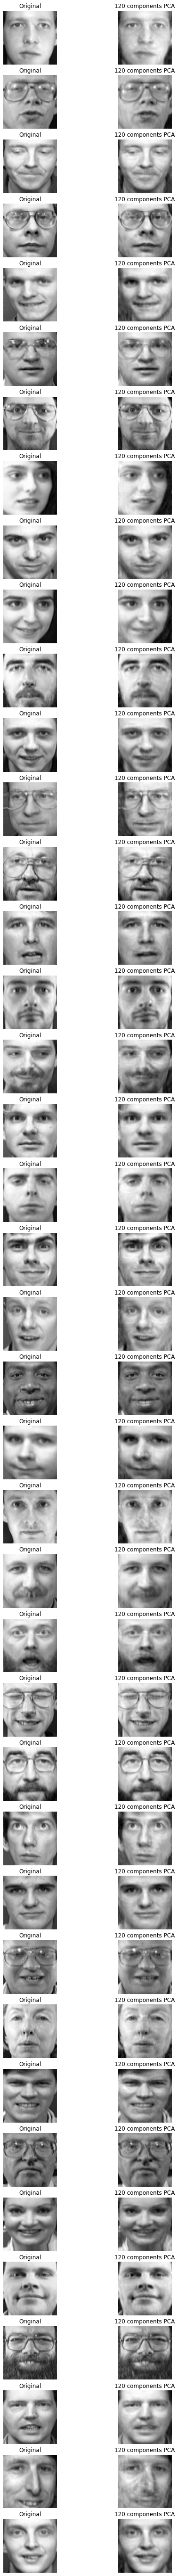

In [ ]:
num_comp = pca.n_components_

fig, axs = plt.subplots(40,2)
fig.set_figheight(100)
fig.set_figwidth(8)
for i in range(40):
  target = np.random.choice(np.where(y_train == i)[0])
  img_projected = pca.inverse_transform(X_train_pca[target])
  img_projected = scaler.inverse_transform(img_projected)
  org_image = scaler.inverse_transform(X_train[target])
  axs[i][0].grid('off')
  axs[i][0].axis('off')
  axs[i][1].grid('off')
  axs[i][1].axis('off')
  axs[i][0].set_title('Original')
  axs[i][1].set_title(str(num_comp)+' components PCA')
  axs[i][0].imshow(org_image.reshape(IMG_H, IMG_W), cmap='gray')
  axs[i][1].imshow(img_projected.reshape(IMG_H, IMG_W), cmap='gray')
plt.show()

Thử in ra tấm hình trung bình


In [ ]:
mean_img = scaler.inverse_transform(pca.mean_)

Text(0.5, 1.0, 'Average Face')

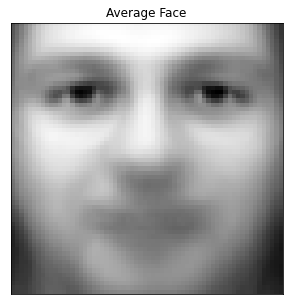

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(mean_img.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

## 5.2.4 [1 Point] Áp dụng SVM để phân loại

Thử phân loại các khuôn mặt với model = SVC đơn giản (không truyền tham số)

In [ ]:
np.random.seed(42)

# TODO
# 1. import SVC từ sklearn
# 2. khởi tạo SVC, CHỈ TRUYỀN VÀO random_state=42
# 3. đặt tên biến là model
# 4. fit model trên X_train_pca và y_train
# 5. dùng model.score để in ra accuracy trên Train Set và Test Set

from sklearn.svm import SVC

model = SVC()
model.fit(X_train_pca, y_train)
print('Accuracy on Train Set:', model.score(X_train_pca, y_train))
print('Accuracy on Test Set:', model.score(X_test_pca, y_test))

Accuracy on Train Set: 1.0
Accuracy on Test Set: 0.9416666666666667


**Chú ý: khi kết quả trên Train Set cao hơn nhiều so với 
kết quả trên Test Set, ta nói model đang bị overfit (quá khớp) tức là model đang học thuộc data trên tập Train, do đó kết quả khi Test là không tốt**

## 5.2.5 [1 Point] Dùng GridSearchCV để fine-tune SVC

Trước tiên, ta tạo 1 dictionary chứa các tham số muốn tune.

Trong bài này ta sẽ tune:

*   kernel: [linear, rbf, poly] là các kernel phổ biến của SVM
*   C và gamma



In [ ]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

rbf_search = {'kernel': ['rbf'], 'gamma': gamma_values, 'C': C_values}

linear_poly_search = {'kernel': ['linear','poly'], 'C': C_values}

param_grid = [rbf_search, linear_poly_search]

Tiếp theo ta dùng GridSearchCV để tune SVC

In [ ]:
np.random.seed(42)

# TODO
# 1. import SVC
# 2. khởi tạo SVC
# 3. khởi tạo GridSearchCV với số k-fold (cv) = 3
# 4. fit trên Train Set (X_train_pca, y_train)
# 5. in ra best params

from sklearn.model_selection import GridSearchCV
model = SVC()
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.01, 'kernel': 'linear'}


Lấy ra best model từ GridSearchCV sau đó tính accuracy trên Train Set và Test Set

In [ ]:
# TODO
# 1. lấy ra best model từ grid.best_estimator_
# 2. Đặt tên biến là best_model
# 2. Dùng best_model.score để in ra accuracy
best_model = grid.best_estimator_
print('Accuracy score on Train Set:',str(best_model.score(X_train_pca, y_train)))
print('Accuracy score on Test Set:',str(best_model.score(X_test_pca, y_test)))

Accuracy score on Train Set: 1.0
Accuracy score on Test Set: 0.9666666666666667


Dùng confusion matrix kết hợp với heatmap để xem model bị nhầm lẫn giữa những class nào trên Test Set

**seaborn là 1 thư viện vẽ chart khác của python**

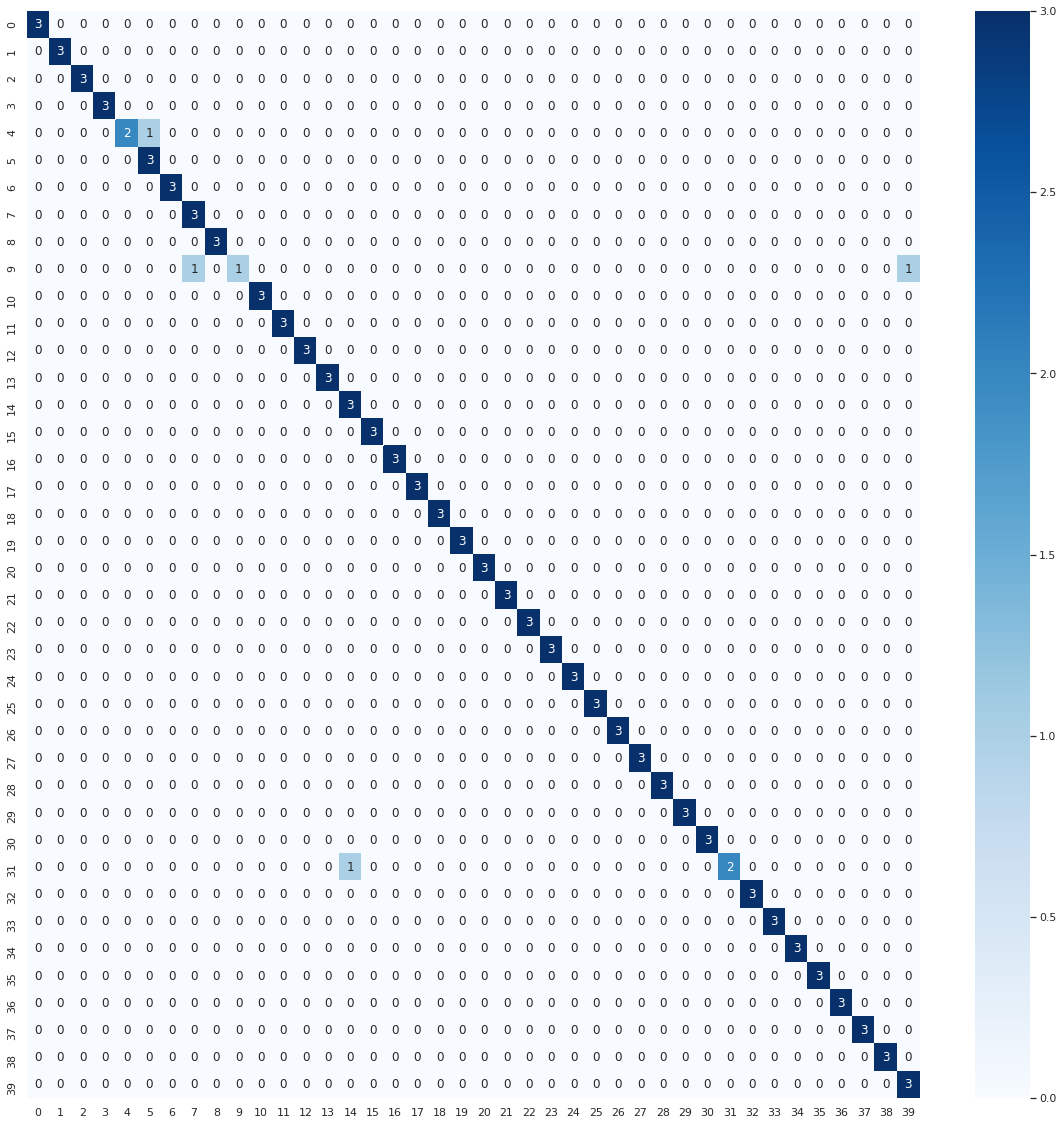

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
y_pred = best_model.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, 
            cmap='Blues')

# End of assignment 5, happy coding

Thử sử dụng số component khác khi khởi tạo PCA xem kết quả có tốt hơn không nhé